In [450]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [451]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [452]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [453]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [454]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [455]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [456]:
#Data do imóvel mais antigo 
df['date'].sort_values(ascending=True)[0]

Timestamp('2014-10-13 00:00:00')

In [457]:
#Quantos imóveis possuem o número máximo de andares
maximo = df['floors'].max()
df[df['floors']== maximo].shape[0]

8

In [458]:
#Classificação dos imóveis por padrão 
df['level'] = 'standard'
df.loc[df['price'] > 540000,'level'] = 'high_standard'
df.loc[df['price'] < 540000, 'level'] = 'lower_standard'
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,level
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,lower_standard
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,lower_standard
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,lower_standard
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,high_standard
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,lower_standard


In [459]:
df[['price', 'id', 'date', 'bedrooms','sqft_lot', 'level']].sort_values('price', ascending = True)

,price,id,date,bedrooms,sqft_lot,level
1149,75000.0,3421079032,2015-02-17,1,43377,lower_standard
15293,78000.0,40000362,2014-05-06,2,16344,lower_standard
465,80000.0,8658300340,2014-05-23,1,5050,lower_standard
16198,81000.0,3028200080,2015-03-24,2,9975,lower_standard
8274,82000.0,3883800011,2014-11-05,3,10426,lower_standard
...,...,...,...,...,...,...
1448,5350000.0,8907500070,2015-04-13,5,23985,high_standard
4411,5570000.0,2470100110,2014-08-04,5,35069,high_standard
9254,6885000.0,9208900037,2014-09-19,6,31374,high_standard
3914,7062500.0,9808700762,2014-06-11,5,37325,high_standard


In [460]:
df.shape

(21613, 22)

In [461]:
df.loc[df['date'] >= '2014-01-01', 'house_age'] = 'new_house'
df.loc[df['date'] <= '2014-01-01', 'house_age'] = 'old_house'
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,level,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,lower_standard,new_house
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,lower_standard,new_house
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,lower_standard,new_house
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,high_standard,new_house
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,lower_standard,new_house


In [462]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [463]:
df.loc[df['bedrooms'] == 1, 'dormitory_type'] = 'studio'
df.loc[df['bedrooms']== 2, 'dormitory_type'] = 'apartament'
df.loc[df['bedrooms'] > 2, 'dormitory_type'] = 'house'
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,level,house_age,dormitory_type
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,lower_standard,new_house,house
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,lower_standard,new_house,house
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,lower_standard,new_house,apartament
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,high_standard,new_house,house
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,lower_standard,new_house,house


<AxesSubplot:xlabel='dormitory_type'>

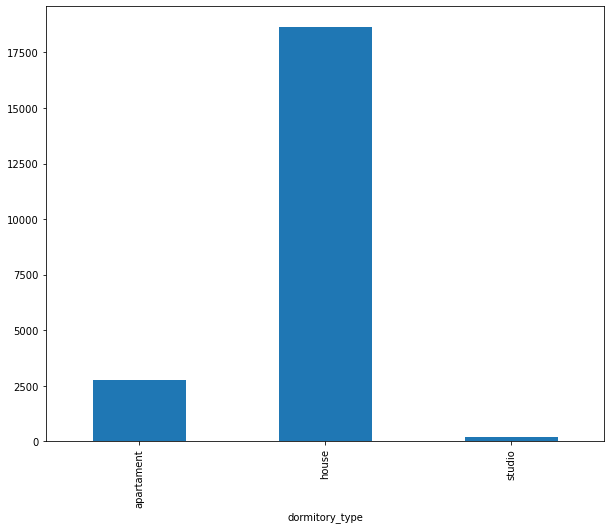

In [464]:
plt.figure(figsize =(10,8) )
df.groupby('dormitory_type')['id'].count().plot.bar()

In [465]:
df['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [466]:
df.loc[df['condition'] <= 2, 'condition_type'] = 'bad'
df.loc[(df['condition'] == 3 ) | (df['condition'] == 4), 'condition_type' ] = 'regular'
df.loc[df['condition'] == 5, 'condition_type'] = 'good'
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,level,house_age,dormitory_type,condition_type
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,lower_standard,new_house,house,regular
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,lower_standard,new_house,house,regular
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,lower_standard,new_house,apartament,regular
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,high_standard,new_house,house,good
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,lower_standard,new_house,house,regular


<AxesSubplot:xlabel='condition_type'>

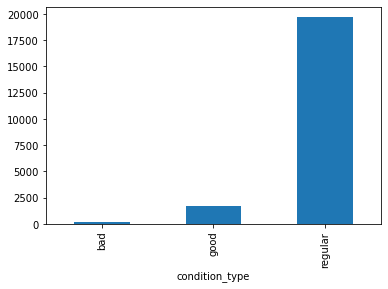

In [467]:
df.groupby('condition_type')['id'].count().plot.bar()

In [468]:
df.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                  int64
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
level                     object
house_age                 object
dormitory_type            object
condition_type            object
dtype: object

In [469]:
df['condition'] = df['condition'].astype(str)
df.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                 object
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
level                     object
house_age                 object
dormitory_type            object
condition_type            object
dtype: object

In [470]:
#Remover colunas
df = df.drop(columns = ['sqft_lot15', 'sqft_living15'])

In [471]:
df.shape

(21613, 23)

In [472]:
df.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                 object
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
level                     object
house_age                 object
dormitory_type            object
condition_type            object
dtype: object

In [473]:
#Modificar o tipo para data
df['yr_built'] = pd.to_datetime(df['yr_built'])
df.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                 object
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built          datetime64[ns]
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
level                     object
house_age                 object
dormitory_type            object
condition_type            object
dtype: object

In [474]:
df['yr_renovated'] = pd.to_datetime(df['yr_renovated'])         
df.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                 object
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built          datetime64[ns]
yr_renovated      datetime64[ns]
zipcode                    int64
lat                      float64
long                     float64
level                     object
house_age                 object
dormitory_type            object
condition_type            object
dtype: object

In [475]:
#Data mais antiga de um imóvel construido
df['yr_built'].sort_values(ascending=True)

4697    1970-01-01 00:00:00.000001900
2961    1970-01-01 00:00:00.000001900
12369   1970-01-01 00:00:00.000001900
15016   1970-01-01 00:00:00.000001900
5236    1970-01-01 00:00:00.000001900
                     ...             
21270   1970-01-01 00:00:00.000002015
17098   1970-01-01 00:00:00.000002015
7526    1970-01-01 00:00:00.000002015
20086   1970-01-01 00:00:00.000002015
14489   1970-01-01 00:00:00.000002015
Name: yr_built, Length: 21613, dtype: datetime64[ns]

In [476]:
df['yr_built']

0       1970-01-01 00:00:00.000001955
1       1970-01-01 00:00:00.000001951
2       1970-01-01 00:00:00.000001933
3       1970-01-01 00:00:00.000001965
4       1970-01-01 00:00:00.000001987
                     ...             
21608   1970-01-01 00:00:00.000002009
21609   1970-01-01 00:00:00.000002014
21610   1970-01-01 00:00:00.000002009
21611   1970-01-01 00:00:00.000002004
21612   1970-01-01 00:00:00.000002008
Name: yr_built, Length: 21613, dtype: datetime64[ns]

In [477]:
#Imóveis com 2 andares
df[df['floors'] ==2].count()[0]

8241

In [478]:
#Imóveis classificados como regular
df.groupby('condition_type')['id'].count()[2]

19710

In [479]:
df.groupby('waterfront')['id'].count()


waterfront
0    21450
1      163
Name: id, dtype: int64

In [480]:
df.groupby('condition_type')['waterfront'].count()

condition_type
bad          202
good        1701
regular    19710
Name: waterfront, dtype: int64

In [481]:
#Imóveis com bad condition e com vista para o mar.
df.loc[(df['condition_type'] == 'bad') & (df['waterfront'] == 1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,level,house_age,dormitory_type,condition_type
11225,6613000935,2014-05-13,2555000.0,4,2.5,5300,26211,2.0,1,2,...,730,1970-01-01 00:00:00.000001923,1970-01-01,98105,47.6610,-122.269,high_standard,new_house,house,bad
15371,7936500221,2015-01-14,658000.0,2,1.0,1010,14244,1.0,1,4,...,0,1970-01-01 00:00:00.000001926,1970-01-01,98136,47.5476,-122.399,high_standard,new_house,apartament,bad


In [482]:
#Imóveis com boas condições(condition_type =good) e sao casas novas(house_age = new_house)
df[(df['condition_type'] == 'good') & (df['house_age'] == 'new_house')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,level,house_age,dormitory_type,condition_type
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1970-01-01 00:00:00.000001965,1970-01-01,98136,47.5208,-122.393,high_standard,new_house,house,good
25,1202000200,2014-11-03,233000.0,3,2.00,1710,4697,1.5,0,0,...,0,1970-01-01 00:00:00.000001941,1970-01-01,98002,47.3048,-122.218,lower_standard,new_house,house,good
27,3303700376,2014-12-01,667000.0,3,1.00,1400,1581,1.5,0,0,...,0,1970-01-01 00:00:00.000001909,1970-01-01,98112,47.6221,-122.314,high_standard,new_house,house,good
49,822039084,2015-03-11,1350000.0,3,2.50,2753,65005,1.0,1,2,...,588,1970-01-01 00:00:00.000001953,1970-01-01,98070,47.4041,-122.451,high_standard,new_house,house,good
62,5072410070,2014-10-21,505000.0,3,1.75,2519,8690,2.0,0,0,...,0,1970-01-01 00:00:00.000001973,1970-01-01,98166,47.4428,-122.344,lower_standard,new_house,house,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19604,7518504130,2014-06-26,663000.0,3,2.00,1480,3876,1.0,0,0,...,620,1970-01-01 00:00:00.000001928,1970-01-01,98117,47.6808,-122.382,high_standard,new_house,house,good
19620,3902100175,2014-07-28,850000.0,5,3.00,3900,5250,1.5,0,1,...,1280,1970-01-01 00:00:00.000001931,1970-01-01,98116,47.5577,-122.389,high_standard,new_house,house,good
19873,3449000060,2014-10-01,320000.0,3,1.00,1400,9000,1.0,0,0,...,0,1970-01-01 00:00:00.000001959,1970-01-01,98059,47.5022,-122.145,lower_standard,new_house,house,good
19905,2888000030,2014-09-26,500000.0,4,2.25,2270,8196,1.0,0,0,...,1120,1970-01-01 00:00:00.000001963,1970-01-01,98034,47.7214,-122.227,lower_standard,new_house,house,good


In [483]:
df['dormitory_type'].unique()

array(['house', 'apartament', 'studio', nan], dtype=object)

In [484]:
#Valor do Imóvel mais caro registrado como 'studio' 
df.groupby('dormitory_type')['price'].max()[2]

1247000.0

In [488]:
# Maior número de quartos que o imóvel do tipo 'house' possui.
df.groupby('dormitory_type')['bedrooms'].max()[1]

33

In [489]:
df[['bedrooms', 'dormitory_type', 'id']].sort_values('bedrooms', ascending = False)

,bedrooms,dormitory_type,id
15870,33,house,2402100895
8757,11,house,1773100755
15161,10,house,5566100170
13314,10,house,627300145
19254,10,house,8812401450
...,...,...,...
19452,0,NaN,3980300371
8484,0,NaN,2310060040
875,0,NaN,6306400140
8477,0,NaN,2569500210


In [491]:
#Quantidade de imóveis com o número máximo de quartos
df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,level,house_age,dormitory_type,condition_type
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,580,1970-01-01 00:00:00.000001947,1970-01-01,98103,47.6878,-122.331,high_standard,new_house,house,good
